<a href="https://colab.research.google.com/github/ujjwalkuikel/PyTorch-Learning/blob/main/Pytorch_crash_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tensor Basics

Tensor is a multidimensional matrix containing elements of single data types.

Tensors are just a flexible way to store and work with numbers, no matter how many dimensions.

In [ ]:
import torch

Empty tensors

In [ ]:
x = torch.empty(1);
print(x);

x = torch.empty(2,3);
print(x);

x = torch.empty(2,3,4);
print(x);

tensor([1.1107])
tensor([[ 9.2011e-33,  0.0000e+00,  9.1994e-33],
        [ 0.0000e+00, -3.1962e+12,  7.7174e-34]])
tensor([[[0.0000e+00, 1.7927e-37, 0.0000e+00, 0.0000e+00],
         [1.7192e-37, 0.0000e+00, 0.0000e+00, 9.5008e-43],
         [9.5709e-43, 0.0000e+00, 2.0319e-43, 0.0000e+00]],

        [[9.2033e-33, 0.0000e+00, 1.1107e+00, 4.5623e-41],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3262e-43]]])


In [ ]:
x = torch.rand(5,3)
print(x)

tensor([[0.4078, 0.1731, 0.8734],
        [0.5298, 0.7077, 0.0092],
        [0.5149, 0.1595, 0.9871],
        [0.5503, 0.2027, 0.0090],
        [0.3119, 0.5442, 0.2859]])


In [ ]:
torch.zeros(5,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
y = torch.ones(2,5)

In [ ]:
y.size()

torch.Size([2, 5])

In [ ]:
print(x.dtype)

torch.float32


Datatype can be specified like
tensor.zeroes(2,3,dtype = torch.float16)

In [ ]:
torch.ones(2,5,5, dtype = torch.int32)

tensor([[[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]]], dtype=torch.int32)

In [ ]:
x = torch.tensor([2,5])
print(x, x.dtype)

tensor([2, 5]) torch.int64


By default require_grad is False.
It means it will need to calc gradient for this tensor.


Gradients tell us:
Which way and how much to tweak these numbers to improve the outcome.


In [ ]:
x = torch.tensor([2,5], requires_grad=False)


In [ ]:
# #Operations
# z = x+y
# # or
# torch.add(x,y)

RuntimeError: The size of tensor a (2) must match the size of tensor b (5) at non-singleton dimension 1

In [ ]:
#To reshape tensor "view"

x = torch.randn(4,4)

y= x.view(16)

In [ ]:
abc = x.numpy()

In [ ]:
print(type(abc))

<class 'numpy.ndarray'>


In [ ]:
# numpy to tensor
tensor = torch.from_numpy(abc)
tensor

tensor([[-0.4582, -0.8016,  1.4837, -1.2320],
        [-0.5063,  0.0940,  1.0205, -0.4903],
        [-0.6697, -0.8727,  0.8178,  2.1741],
        [ 0.9731,  1.0271,  1.2378, -0.9583]])

In [ ]:
torch.tensor(abc)

tensor([[-0.4582, -0.8016,  1.4837, -1.2320],
        [-0.5063,  0.0940,  1.0205, -0.4903],
        [-0.6697, -0.8727,  0.8178,  2.1741],
        [ 0.9731,  1.0271,  1.2378, -0.9583]])

GPU, CPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")

In [ ]:
## moving
x = torch.randn(2,2).to(device)

In [ ]:
## creating in GPU
z = torch.randn(9, device = device)

### Autograd

Autograd provides automatic differentiation for all operations on Tensors.

It’s a system that automatically calculates gradients (derivatives) for tensors.

**How does it work in practice?**


1. You create tensors with requires_grad=True.

2. Perform operations on them — PyTorch remembers how they were created.

3. Call .backward() on a result tensor to compute gradients.

4. Access .grad on the original tensors to see their gradients.


**What is torch.autograd?**

-> torch.autograd is the PyTorch submodule that powers automatic differentiation — it’s short for "automatic gradient".


Think of it as the engine that:
* Records how tensors were computed (the computation graph),
* And then computes the gradients (backward pass) when asked.

In [ ]:
x = torch.randn(3,requires_grad = True)

In [ ]:
y = x+2

print(x)

print(y)

print(y.grad_fn)

tensor([ 1.2899,  0.6815, -1.4241], requires_grad=True)
tensor([3.2899, 2.6815, 0.5759], grad_fn=<AddBackward0>)


In [ ]:
z = 3*y**2
print(z)

tensor([32.4695, 21.5716,  0.9951], grad_fn=<MulBackward0>)


In [ ]:
z = z.mean()
print(z)

tensor(18.3454, grad_fn=<MeanBackward0>)


In [ ]:
print(x.grad)

None


In [ ]:
z.backward()
print(x.grad)

tensor([6.5797, 5.3630, 1.1518])


`.backward()` accumulates the gradient for this tensor into .grad attribute

Also, be careful during optmization. `optimizer.zero_grad()`


To stop a tensor from tracking history
we can use


*   `x.requires_grad(false)`
* `x.detach()`
*   wrap in `with torch.nograd():


---



In [ ]:
a = torch.randn(2,2)

In [ ]:
b = (a*a).sum()

In [ ]:
print(a.requires_grad)

False


In [ ]:
a = torch.randn(3,3)
a.requires_grad_(True)
b = (a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

True


In [ ]:
print(b.requires_grad)

True


In [ ]:
b = a.detach()
print(b)

tensor([[ 1.4779,  0.9963,  0.7555],
        [-0.7122,  0.7583,  0.2316],
        [-0.6261,  1.0752, -0.6383]])


In [ ]:
a = torch.randn(3,3)
a.requires_grad_(True)
b = (a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

True


In [ ]:
with torch.no_grad():
  b = (a*a).sum()
  print(b.grad_fn)

None


### LR using Autograd

In [ ]:
x = torch.tensor([1,2,3,4,5,6],dtype = torch.float32)
y = torch.tensor([3,6,9,12,15,18],dtype = torch.float32)

In [ ]:
w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

In [ ]:
def forward(x):
  return w*x

In [ ]:
def loss(y,y_pred):
  return ((y_pred-y)**2).mean()

In [ ]:
x_test = 4
print(f'prediction before training: f({x_test}) = {forward(x_test).item():.3f}')

prediction before training: f(4) = 0.000


In [ ]:
learning_rate = 0.01
n_epochs = 1000

for epoch in range(n_epochs):
  y_pred = forward(x)

  l = loss(y,y_pred)

  l.backward()

  with torch.no_grad():
    w-= learning_rate * w.grad


  w.grad.zero_()


print(f'prediction after training: f({x_test}) = {forward(x_test).item():.3f}')




prediction after training: f(4) = 12.000


In [ ]:
x_test = 9

In [ ]:
print(f'prediction after training: f({x_test}) = {forward(x_test).item():.3f}')


prediction after training: f(9) = 27.000


### Model Loss and Optimizer

Pytorch pipeline looks like


1.   Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  * Forward = compute prediction and loss
  * backward = compute gradients
  * Update weights


In [ ]:
import torch
import torch.nn as nn

In [ ]:
x = torch.tensor([[1],[2],[3],[4],[5],[6]],dtype = torch.float32)
y = torch.tensor([[3],[6],[9],[12],[15],[18]],dtype = torch.float32)

In [ ]:
n_samples,n_features = x.shape

In [ ]:
print(f'n_samples = {n_samples},n_features = {n_features}')

n_samples = 6,n_features = 1


In [ ]:
x_test = torch.tensor([5],dtype = torch.float32)

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim,output_dim)


  def forward(self,x):
    return self.lin(x)

In [ ]:
input_size, output_size = n_features, n_features

model = LinearRegression(input_size,output_size)

print(f'Prediction before training: {x_test.item()} = {model(x_test).item():.3f}')


Prediction before training: 5.0 = -4.356


In [ ]:
#2 Define loss and optimizer
learning_rate = 0.01
n_epochs = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [ ]:
#Training Loop

for epoch in range(n_epochs):
  # predict
  y_predicted = model(x)

  #calculate loss
  l = loss(y,y_predicted)

  #calculate gradients
  l.backward()

  #update weights
  optimizer.step()

  #empty/xero gradient
  optimizer.zero_grad()

  if(epoch+1)%10 == 0:
    w,b = model.parameters()
    print(f'epoch',epoch+1 , '  w : ', w[0][0].item(), ' loss: ',l.item)

epoch 10   w :  2.98881196975708  loss:  <built-in method item of Tensor object at 0x7f2d09096390>
epoch 20   w :  2.989213705062866  loss:  <built-in method item of Tensor object at 0x7f2d090e49b0>
epoch 30   w :  2.989600896835327  loss:  <built-in method item of Tensor object at 0x7f2d24f78c50>
epoch 40   w :  2.9899742603302  loss:  <built-in method item of Tensor object at 0x7f2d09096390>
epoch 50   w :  2.9903342723846436  loss:  <built-in method item of Tensor object at 0x7f2d090e4ad0>
epoch 60   w :  2.9906811714172363  loss:  <built-in method item of Tensor object at 0x7f2d24f78c50>
epoch 70   w :  2.991015672683716  loss:  <built-in method item of Tensor object at 0x7f2d09096390>
epoch 80   w :  2.9913382530212402  loss:  <built-in method item of Tensor object at 0x7f2d090e49b0>
epoch 90   w :  2.9916493892669678  loss:  <built-in method item of Tensor object at 0x7f2d24f78c50>
epoch 100   w :  2.9919490814208984  loss:  <built-in method item of Tensor object at 0x7f2d0909639

In [ ]:
print(f'Prediction after training: {x_test.item()} = {model(x_test).item():.3f}')

Prediction after training: 5.0 = 15.000


### First Neural Network

3 step approach
  1. Define model i.e. input, output, forward pass with different layers
  2. Construct loss and optimizer
  3. Training Loop
    * Forward
      * Prediction
      * Loss
    * Backward
      * compute gradients

    * Update Weights
  





In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device = torch.device('cpu')

In [ ]:
##Hyper parameters
input_size = 784
hidden_size = 1000
num_classes = 10
n_epochs =  2
batch_size = 100
learning_rate = 0.001

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download= True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 341kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.14MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.17MB/s]


In [ ]:
test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train = False,
                                           transform = transforms.ToTensor(),
                                           download= True)

In [ ]:
#Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [ ]:
#Data Loader
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

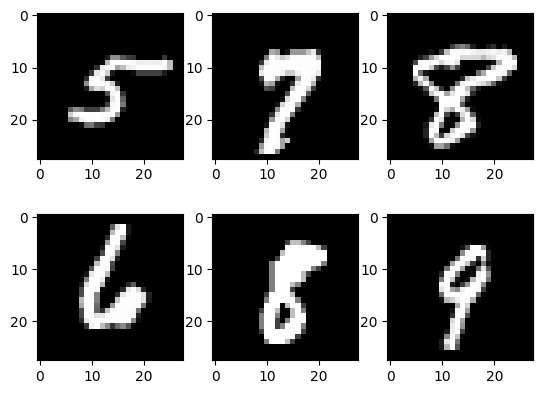

In [ ]:
examples = iter(test_loader)
example_data, example_target = next(examples)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0],cmap='gray')
plt.show()

In [ ]:
class NeuralNet(nn.Module):

  def __init__(self, input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)

    self.relu = nn.ReLU()

    self.l2 = nn.Linear(hidden_size, num_classes)


  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out



In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
## 2. Loss and Optmizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## training Loop
n_total_steps = len(train_loader)

for epoch in range(n_epochs):
  for i, (images,labels) in enumerate(train_loader):

    images = images.reshape(-1 , 28*28).to(device)

    labels = labels.to(device)


    # forward pass and loss

    outputs = model(images)
    # print(outputs.shape)  # should be [batch_size, num_classes]
    loss = criterion(outputs,labels)


    #backward
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    if (i+1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, step: {i+1}/{n_total_steps}, Loss: {loss.item():.3f}')



Epoch 1/2, step: 100/600, Loss: 0.089
Epoch 1/2, step: 200/600, Loss: 0.041
Epoch 1/2, step: 300/600, Loss: 0.057
Epoch 1/2, step: 400/600, Loss: 0.056
Epoch 1/2, step: 500/600, Loss: 0.086
Epoch 1/2, step: 600/600, Loss: 0.028
Epoch 2/2, step: 100/600, Loss: 0.048
Epoch 2/2, step: 200/600, Loss: 0.017
Epoch 2/2, step: 300/600, Loss: 0.048
Epoch 2/2, step: 400/600, Loss: 0.064
Epoch 2/2, step: 500/600, Loss: 0.013
Epoch 2/2, step: 600/600, Loss: 0.055


In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)


  for images,labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    _,predicted = torch.max(outputs,1)
    n_correct += (predicted==labels).sum().item()

  acc = n_correct/n_samples

  print(f'Accuracy of the network on {n_samples} test images: {acc*100}%')

Accuracy of the network on 10000 test images: 9.82%


### Convolutional Neural network
  * Convolutional Layers
  * Max Pooling
  * Save/Load model

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                           train = True,
                                           transform = transform,
                                           download= True)

100%|██████████| 170M/170M [00:05<00:00, 29.5MB/s]


In [ ]:
test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                           train = False,
                                           transform = transform,
                                           download= True)

In [ ]:
#Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [ ]:
#Data Loader
test_loader = torch.utils.data.DataLoader(dataset=test_loader,
                                           batch_size=batch_size,
                                           shuffle=True)

In [ ]:
classes = ('plane','car','bird','cat',
           'deer','dog','frog','horse','ship','truck')